In [1]:
import cv2
%matplotlib inline
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

In [2]:
configpath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,configpath)

In [4]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


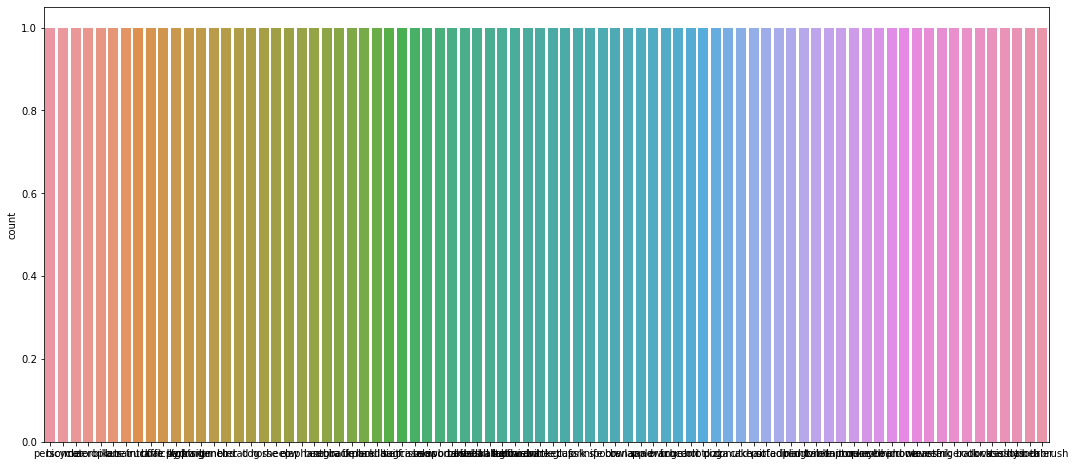

In [7]:
import seaborn as sns
plt.figure(figsize = (18,8))
sns.countplot(x =classLabels )

In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 00000255828DC530>

In [9]:
img = cv2.imread('Dataset\images/00c3fe7209b9b0bc.jpg')

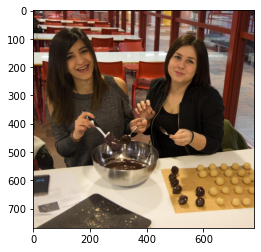

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

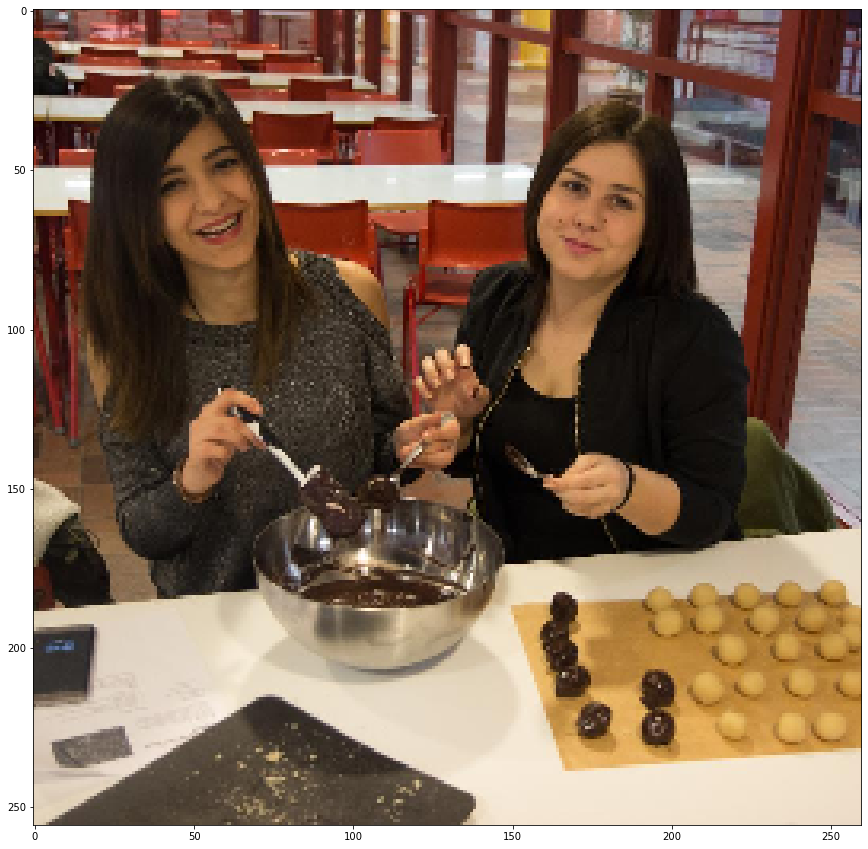

In [12]:
image = cv2.imread('Dataset\images/00c3fe7209b9b0bc.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, None, fx=1/3, fy=1/3)
show(image)

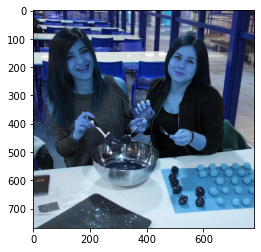

In [13]:
plt.imshow(img)

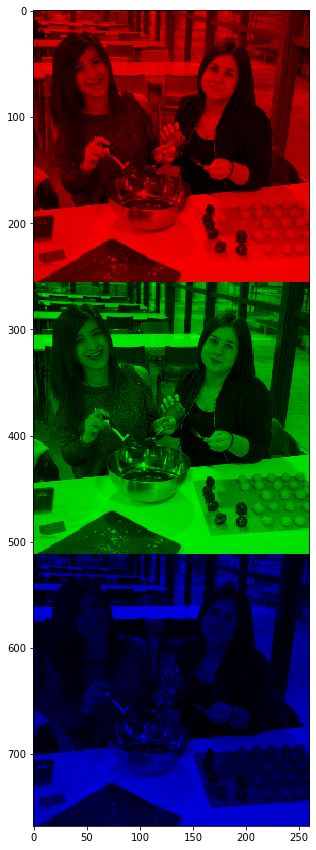

In [14]:
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

In [15]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [16]:
 print(ClassIndex)

[ 1  1 67 62 51 67 60 60 67 60 62 60]


In [17]:
print(bbox) # x, y, w, h

[[ 40  62 346 493]
 [346  72 334 452]
 [  3 471 772 282]
 [338 162 126 175]
 [210 429 223 190]
 [217 137 251  78]
 [626 546  37  33]
 [663 548  37  32]
 [212 121 271 215]
 [701 546  39  32]
 [293 104  91  41]
 [581 542  44  39]]


In [18]:
img.shape

(768, 781, 3)

In [19]:
import pandas as pd
m,n,r = img.shape
arr = img.reshape(m*n, -1)
df = pd.DataFrame(arr, columns=['b', 'g', 'r'])
df.describe()

,b,g,r
count,599808.000000,599808.000000,599808.000000
mean,77.964509,97.227970,123.390985
std,66.967322,71.901345,74.150340
min,0.000000,0.000000,0.000000
25%,22.000000,33.000000,57.000000
50%,55.000000,76.000000,116.000000
75%,130.000000,156.000000,191.000000
max,255.000000,255.000000,255.000000


In [20]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    
    cv2.rectangle(img,boxes,(255, 0, 0), 2 )
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0),thickness=3 )

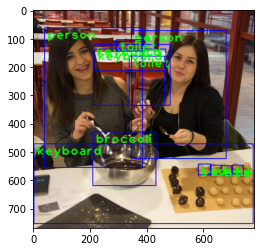

In [21]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))